Imports

In [28]:
import numpy as np
from sklearn.linear_model import LassoCV, RANSACRegressor, Lasso
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

In [59]:
def sum_squared_errors(estimator, X, y):
    return np.sum((np.reshape(estimator.predict(X), (y.shape)) - y) ** 2)

Load data

In [2]:
data_x = np.load('Xtrain_Regression2.npy')
data_y = np.load('Ytrain_Regression2.npy')

Fit a linear regression model using all the data

In [49]:
folds = 10

lasso = LassoCV(cv=folds).fit(data_x, data_y.ravel())

print(lasso.alpha_)
print(lasso.score(data_x, data_y))

0.17950930279330035
0.20824558947660365


### Finding outliers

Z values

In [13]:
x_means = data_x.mean(axis=0)
x_stds = data_x.std(axis=0)
y_mean = data_y.mean(axis=0)
y_std = data_y.std(axis=0)

x_z_scores = (data_x - x_means) / x_stds
y_z_scores = (data_y - y_mean) / y_std

x_outliers = data_x[np.abs(x_z_scores) > 2]
y_outliers = data_y[np.abs(y_z_scores) > 2]

Number of inliers found: 83
0.008
0.948177848101604
6.2459107479301395
0.9558173254171896
6.195547725403898


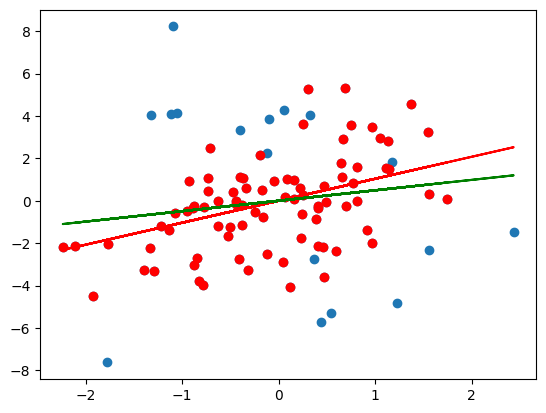

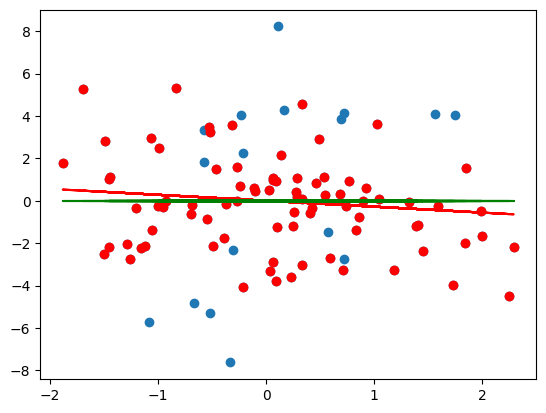

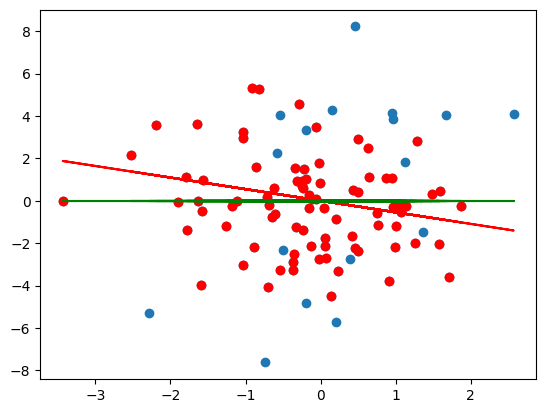

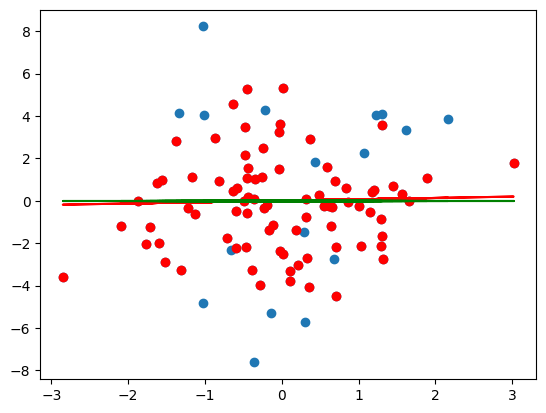

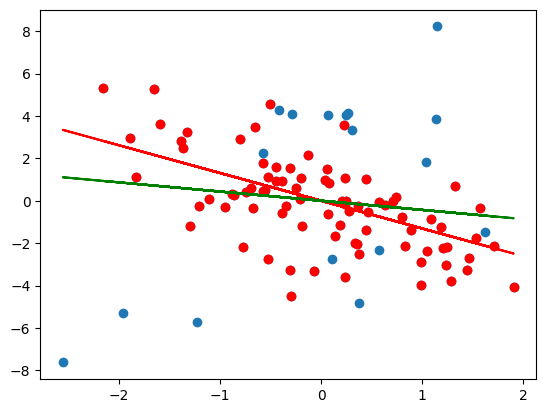

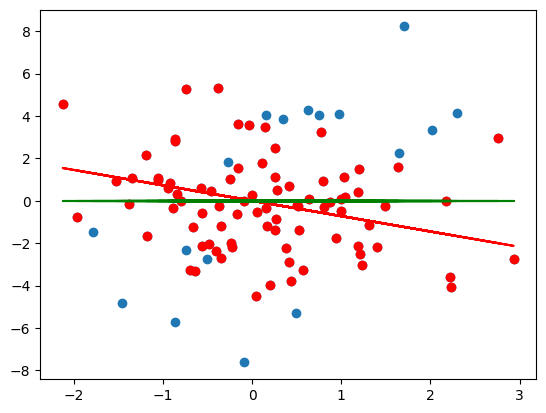

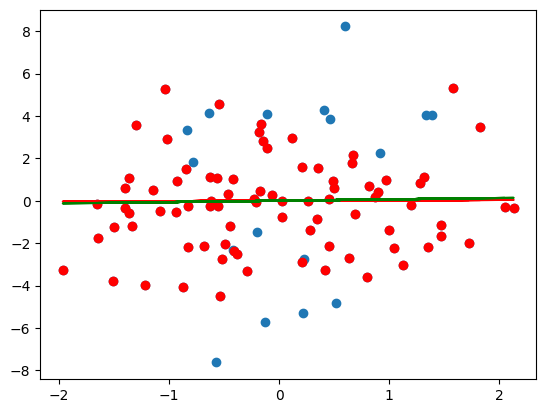

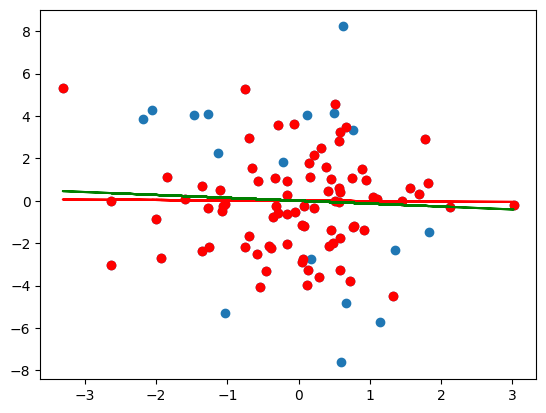

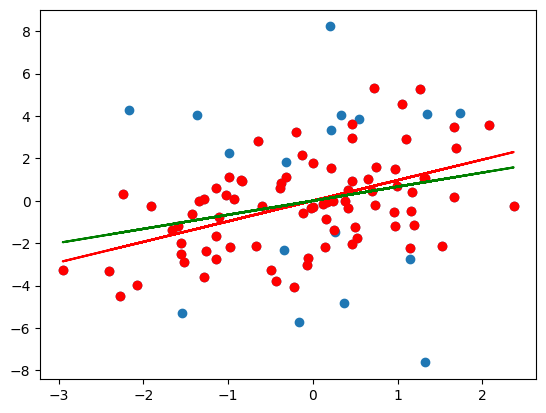

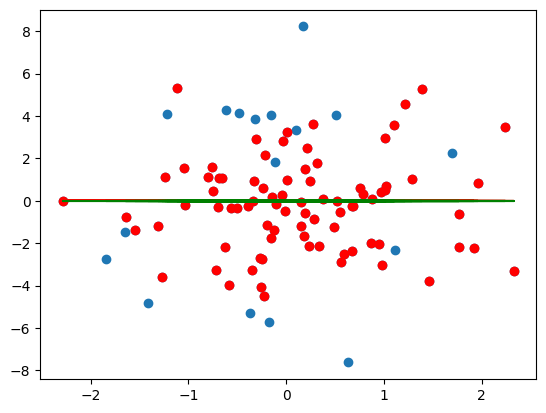

In [67]:
ransac = RANSACRegressor().fit(data_x, data_y.ravel())

cv_score = cross_val_score(ransac, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_], cv=folds)

print("Number of inliers found: %d" % ransac.inlier_mask_.sum())

model = LassoCV(cv=folds, alphas=np.arange(0.001, 1, 0.001)).fit(data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_])

print(model.alpha_)
print(cross_val_score(model, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_], cv=folds).mean())
print(sum_squared_errors(model, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_]))

print(cv_score.mean())
print(sum_squared_errors(ransac, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_]))

for feature in range(10):
    plt.figure(feature)
    plt.scatter(data_x[:,feature], data_y)  
    plt.scatter(data_x[ransac.inlier_mask_, feature], data_y[ransac.inlier_mask_], color='red')
    plt.plot(data_x[:, feature], data_x[:, feature] * ransac.estimator_.coef_[feature], color='red')
    plt.plot(data_x[:, feature], data_x[:, feature] * lasso.coef_[feature], color='green')
    plt.show()